In [2]:
import os
import re
import matplotlib.pyplot as plt

def extract_keff_and_error(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if 'ANA_KEFF' in line:
                try:
                    keff_val = float(line[47:58])
                    keff_err = float(line[59:66])
                    return keff_val, keff_err
                except ValueError:
                    pass
    return None, None

def get_numeric_suffix(filename):
    # Match something like: fission_blanket_hex_10_res.m → 10
    #match = re.search(r'fission_blanket_hex_(\d+)_res\.m$', filename)
    #match = re.search(r'input_(\d+)_(\d+)_(d+)\.txt_res\.m$', filename)
    #return int(match.group(1)) if match else float('inf')
    match = re.search(r'input(\d+)_15_(\d+)\.txt_res', filename)
    return match.group(1) if match else ""

def read_keff_from_folder(folder_path):
    keff_values = []
    keff_errors = []
    numeric_labels = []

    all_files = [f for f in os.listdir(folder_path) if f.endswith('_res.m')]
    sorted_files = sorted(all_files, key=get_numeric_suffix)

    for file_name in sorted_files:
        number = get_numeric_suffix(file_name)
        file_path = os.path.join(folder_path, file_name)
        keff, err = extract_keff_and_error(file_path)
        if keff is not None:
            keff_values.append(keff)
            keff_errors.append(err)
            numeric_labels.append(number)

    return numeric_labels, keff_values, keff_errors

def plot_keff(labels, keff_values, keff_errors):
    if not labels:
        print("[ERROR] No keff data found.")
        return
    plt.figure(figsize=(10, 5))
    plt.errorbar(labels, keff_values, yerr=keff_errors, fmt='o-', capsize=5)
    plt.xticks(labels)
    plt.xlabel('Reflector Thickness [cm]')
    plt.ylabel('keff')
    plt.title('Optimal Reflector Thickness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Your folder here ===
folder_path = '/Users/maxle/Desktop/Desktop2/Dual/10_15_20' 


#labels, keff_values, keff_errors = read_keff_from_folder(folder_path)
#plot_keff(labels, keff_values, keff_errors)




In [21]:
import numpy as np
klist = []
range_outer = np.arange(0,60, 10)
range_inner = np.arange(0,50,10)
print(range_inner)

[ 0 10 20 30 40]


In [22]:
for i in range_outer:
     for j in range_inner:
          klist.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/10/{i}_10_{j}')[1])
#klist.append(read_keff_from_folder('/Users/maxle/Desktop/Desktop2/Dual/100_15_40')[1])
print(klist)

[[0.393089], [0.517001], [0.596624], [0.625482], [0.621033], [0.632146], [0.737589], [0.809069], [0.833563], [0.832542], [0.769765], [0.850124], [0.909233], [0.934191], [0.933595], [0.854799], [0.921908], [0.972062], [0.99779], [0.99549], [0.910171], [0.967645], [1.01326], [1.03946], [1.03568], [0.946963], [0.998701], [1.03856], [1.06551], [1.06138]]


In [23]:
#klist = [[0.845421], [0.89979], [0.921836], [0.922618], [0.923069], [0.974043], [0.991965], [0.993309], [0.977249], [1.01773], [1.03645], [1.03919], [1.01082], [1.04911], [1.06886], [1.06874], [1.03379], [1.06907], [1.08694], [1.08955], [1.04957], [1.08394], [1.1005], [1.10353], [1.06175], [1.09295], [1.11358], [1.11205], [1.06935], [1.10112], [1.11948], [1.11953], [1.07516], [1.10624], [1.12394], [1.12576], [1.07938], [1.11196], [1.12865], [1.12978]]

In [24]:
print(len(klist))

30


In [25]:
innerlist = [0, 10, 20, 30, 40, 0, 10, 20, 30, 40, 0, 10, 20, 30, 40, 0, 10, 20, 30, 40, 0, 10, 20, 30, 40, 0, 10, 20, 30, 40]
len(innerlist)

30

In [26]:
outerlist = [0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40,50, 50, 50, 50, 50]
len(outerlist)

30

In [27]:
print(len(klist), len(innerlist), len(outerlist))

30 30 30


In [28]:

def cylvol(inner, outer, height = 100):
     fus_radius = 25 #25 cm of fusion core radius
     fis_radius = 15 #15 cm of fission blanket radius
     shell_vol = np.pi * height * (((inner + fus_radius)**2 - fus_radius**2) + ((outer + fis_radius + inner + fus_radius)**2 - (fis_radius + inner + fus_radius)**2))
     cap_vol = np.pi * 2 * outer * (outer + fis_radius + inner + fus_radius)**2
     tot_vol = shell_vol + cap_vol
     return tot_vol, shell_vol, cap_vol


In [29]:
volume_list = []
for i in range(len(klist)):
    volume_list.append(cylvol(innerlist[i], outerlist[i])[0])

In [30]:
print(klist)
print(volume_list)

[[0.393089], [0.517001], [0.596624], [0.625482], [0.621033], [0.632146], [0.737589], [0.809069], [0.833563], [0.832542], [0.769765], [0.850124], [0.909233], [0.934191], [0.933595], [0.854799], [0.921908], [0.972062], [0.99779], [0.99549], [0.910171], [0.967645], [1.01326], [1.03946], [1.03568], [0.946963], [0.998701], [1.03856], [1.06551], [1.06138]]
[0.0, 188495.5592153876, 439822.9715025711, 753982.2368615504, 1130973.3552923256, 439822.971502571, 760265.42216873, 1156106.096521044, 1627344.9945595127, 2173982.1162841367, 1080707.872834889, 1558229.9561805374, 2123716.6338267, 2777167.905773377, 3518583.772020568, 1960353.815840031, 2620088.2730938876, 3380353.6952626174, 4241150.0823462205, 5202477.434344698, 3116459.9123610747, 3983539.484751858, 4963716.392671873, 6056990.636121121, 7263362.215099602, 4586725.274241098, 5686282.702997526, 6911503.837897545, 8262388.678941157, 9738937.226128358]


In [31]:
def vol_to_tonne(volume, rho):
     tonnes = volume * rho * 1e-6
     return tonnes

In [32]:
tonne_list = []
for i in range(len(volume_list)):
     tonne_list.append(vol_to_tonne(volume_list[i], 1.7))
print(tonne_list)

[0.0, 0.3204424506661589, 0.7476990515543708, 1.2817698026646356, 1.9226547039969535, 0.7476990515543707, 1.2924512176868408, 1.9653803640857745, 2.7664864907511713, 3.695769597683032, 1.8372033838193111, 2.6489909255069133, 3.6103182775053897, 4.72118543981474, 5.981592412434965, 3.3326014869280525, 4.454150064259609, 5.746601281946449, 7.2099551399885735, 8.844211638385985, 5.297981851013827, 6.772017124078158, 8.438317867542183, 10.296884081405906, 12.347715765669323, 7.7974329662098665, 9.666680595095794, 11.749556524425824, 14.046060754199965, 16.556193284418207]


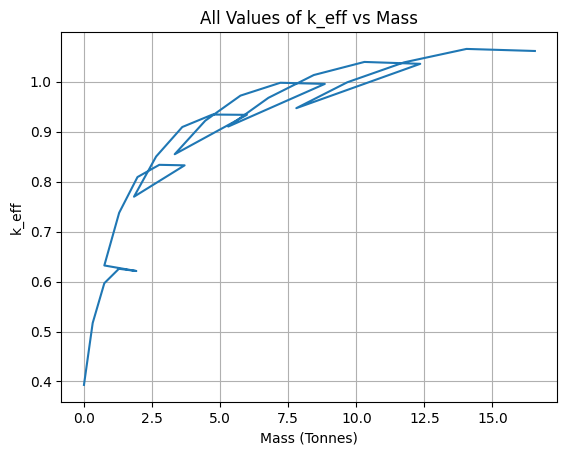

In [33]:
ax1 = plt.axes()
ax1.grid()
ax1.set_xlabel('Mass (Tonnes)')
ax1.set_ylabel('k_eff')
ax1.set_title('All Values of k_eff vs Mass')
ax1.plot(tonne_list, klist)

In [ ]:
def remove_backtracking(list1, list2):
    """
    Removes entries from both lists that would cause backtracking in list1.
    Both lists must be of the same length.
    """
    if len(list1) != len(list2):
        raise ValueError("Lists must be of the same length")
    
    # Extract values from nested lists in list1
    values1 = [x[0] if isinstance(x, list) else x for x in list1]
    
    result1 = []
    result2 = []
    
    # Add the first point
    current_max = values1[0]
    result1.append(list1[0])
    result2.append(list2[0])
    
    # Check each subsequent point
    for i in range(1, len(values1)):
        if values1[i] > current_max:  # Only keep points that increase
            current_max = values1[i]
            result1.append(list1[i])
            result2.append(list2[i])
    
    return result1, result2

In [ ]:
trim_list = klist
trim_volume = volume_list
trim_tonne = tonne_list

In [ ]:
trim_list, trim_tonne = remove_backtracking(trim_list, trim_tonne)

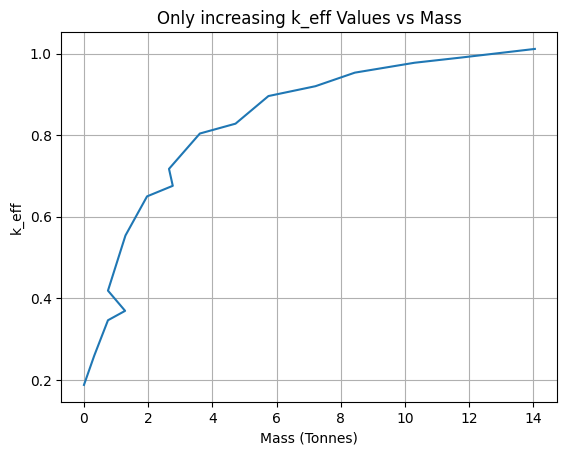

In [ ]:
ax2 = plt.axes()
ax2.grid()
ax2.set_xlabel('Mass (Tonnes)')
ax2.set_ylabel('k_eff')
ax2.set_title('Only increasing k_eff Values vs Mass')
ax2.plot(trim_tonne, trim_list)

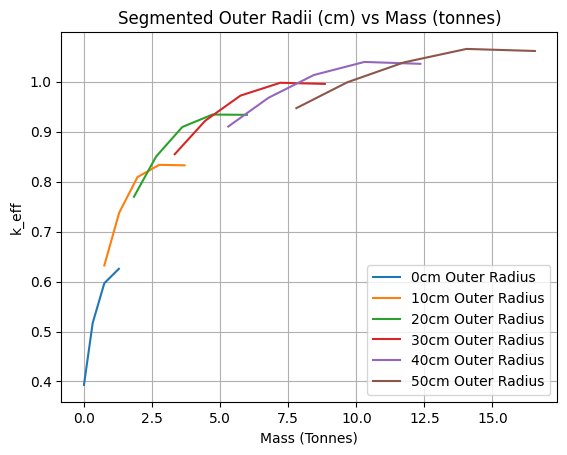

In [35]:
ax3 = plt.axes()
ax3.plot(tonne_list[:4], klist[:4], label = '0cm Outer Radius')
ax3.plot(tonne_list[5:10], klist[5:10], label = '10cm Outer Radius')
ax3.plot(tonne_list[10:15], klist[10:15], label = '20cm Outer Radius')
ax3.plot(tonne_list[15:20], klist[15:20], label = '30cm Outer Radius')
ax3.plot(tonne_list[20:25], klist[20:25], label = '40cm Outer Radius')
ax3.plot(tonne_list[25:30], klist[25:30], label = '50cm Outer Radius')
ax3.grid()
ax3.set_xlabel('Mass (Tonnes)')
ax3.set_ylabel('k_eff')
ax3.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')
ax3.legend()